# Lending Club Case Study - Exploratory Data Analysis

## Problem statement

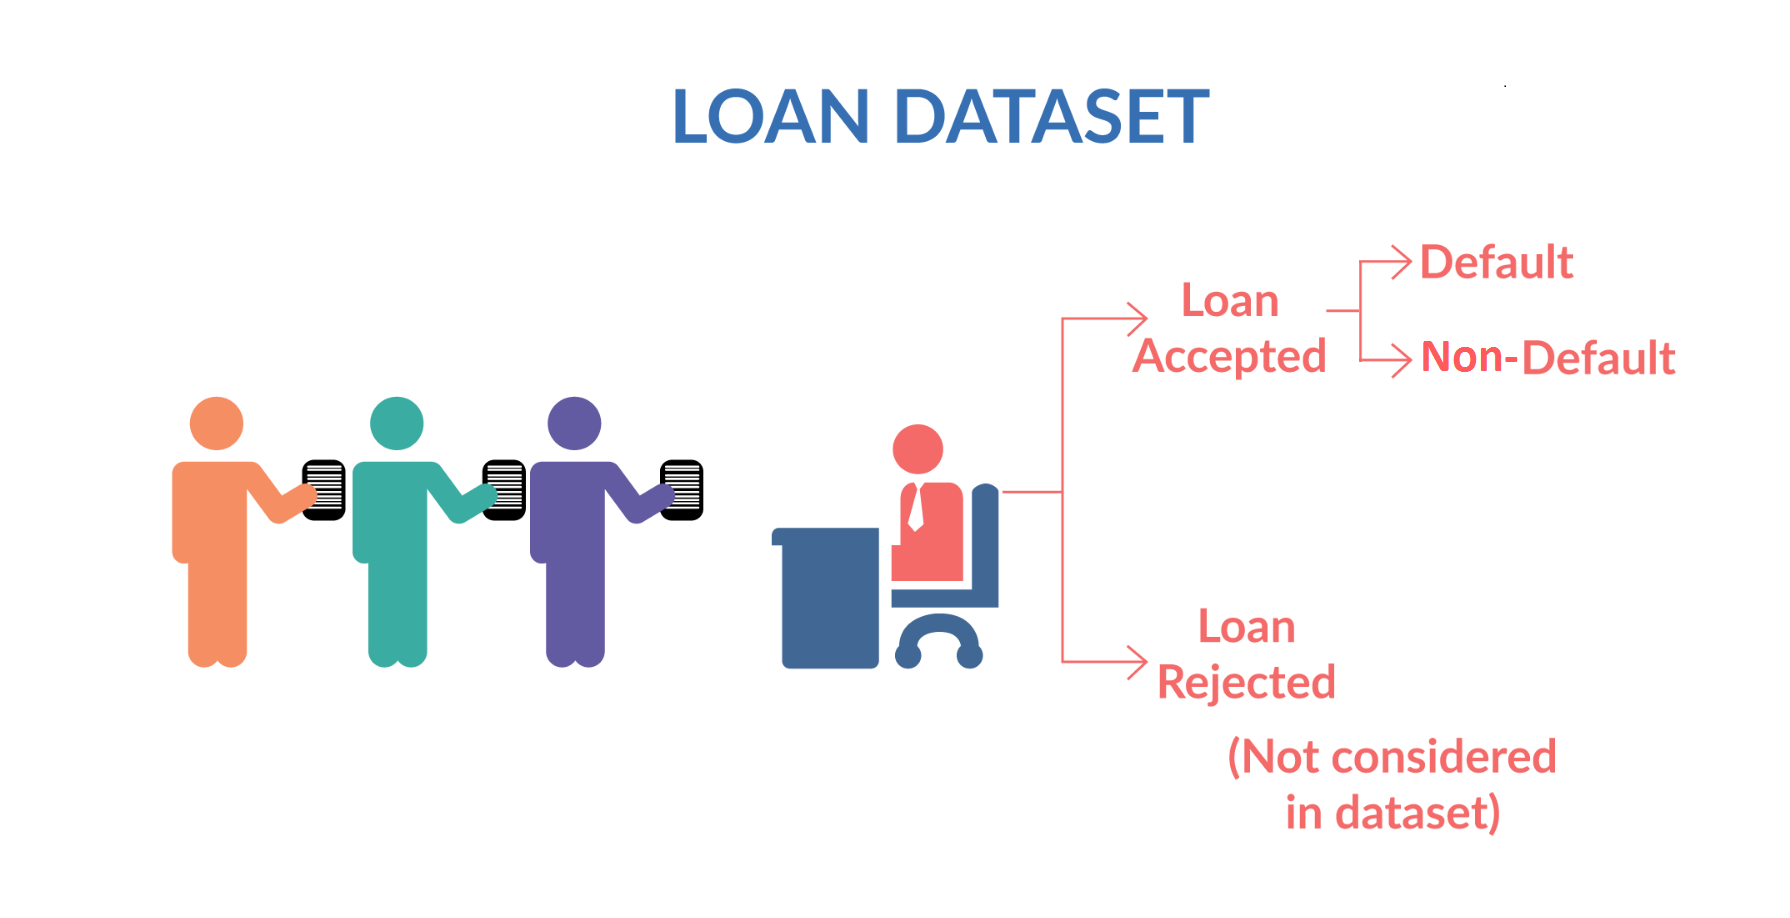
###### You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### When a person applies for a loan, there are two types of decisions that could be taken by the company:

#### Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

- Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

#### Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives

- Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [4]:
# Installing required packages
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load dataset
df = pd.read_csv("loan.csv")
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Describe the dataset
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
# Let's check data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
# Dimensions of the dataset
df.shape

(39717, 111)

In [9]:
# Checking number of records in dataset
no_records = df.shape[0]
no_records

39717

In [10]:
# Check null values
missing = df.isnull().sum()
missing

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
# Take half of the null records
half_records = no_records/2
half_records

19858.5

In [12]:
# Check the records having more than the count of half records
missing_value_columns = list(missing[missing > half_records].index)
missing_value_columns

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [13]:
# Drop the records which are greater than the count of half records
df1 = df.drop(missing_value_columns, axis=1)
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [14]:
# Filter null values count > 0
missing2 = df1.isnull().sum()
missing2 = missing2[missing2>0]
missing2

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

#### Check each columns with their types like numerical or categorical:
###### Let's check from high null values to lower with their impact on the target variable

In [15]:
# Check data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
# desc is of type string/object type with all unique text of borrower's loan purpose description
# As it is all of unique string values and there is no impact on target variable, we can drop this variable
print(df1.desc.nunique())

# Drop the desc column
df1 = df1.drop('desc', axis=1)

26527


In [17]:
# emp_title
print(df1.emp_title.nunique())

# Drop null records
df1 = df1[~df1.emp_title.isnull()]

28820


In [18]:
# emp_length
print(df1.emp_length.unique())

# Drop null records
df1 = df1[~df1.emp_length.isnull()]

['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years' nan]


In [19]:
# pub_rec_bankruptcies
print(df1.pub_rec_bankruptcies.unique())

# Check frequency of these categorical values
df1.pub_rec_bankruptcies.value_counts()

[ 0.  1.  2. nan]


0.0    35039
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
# Drop null records
df1 = df1[~df1.pub_rec_bankruptcies.isnull()]

In [21]:
# last_pymnt_d
print(df1.last_pymnt_d.nunique())

# Drop null records
df1 = df1[~df1.last_pymnt_d.isnull()]

97


In [22]:
# collections_12_mths_ex_med
print(df1.collections_12_mths_ex_med.unique())     
    
# # Drop the collections_12_mths_ex_med column    
df1 = df1.drop('collections_12_mths_ex_med', axis=1)

[ 0. nan]


In [23]:
# chargeoff_within_12_mths
print(df1.chargeoff_within_12_mths.unique())

# Drop the chargeoff_within_12_mths column
df1 = df1.drop('chargeoff_within_12_mths', axis=1)

[ 0. nan]


In [24]:
# revol_util
print(df1.revol_util.nunique())

# Drop null records
df1 = df1[~df1.revol_util.isnull()]

1082


In [25]:
# tax_liens
print(df1.tax_liens.unique())

# Drop the tax_liens column
df1 = df1.drop('tax_liens', axis=1)

[0.]


In [26]:
# title 
print(df1.title.nunique())

# Drop null records
df1 = df1[~df1.title.isnull()]

17954


In [27]:
# last_credit_pull_d
print(df1.last_credit_pull_d.nunique())

# Drop null records
df1 = df1[~df1.last_credit_pull_d.isnull()]

96


In [28]:
# Check remaining null values count > 0
missing3 = df1.isnull().sum()
missing3 = missing3[missing3>0]
missing3

Series([], dtype: int64)

- Now we can observe that missing3 has nothing, that means we removed all null values from the dataset

In [29]:
# After removing all null values, dimension of the dataset
df1.shape

(36433, 50)

## Feature Analysis

In [30]:
#print dataset after removing null values
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,158706,158450,12375,12375,1000.0,36 months,10.91%,404.62,C,C3,...,0.00,0.00,Feb-10,4259.11,May-14,1,INDIVIDUAL,0,0,1.0
39562,154154,151536,4800,4800,1100.0,36 months,10.28%,155.52,C,C1,...,0.00,0.00,Aug-08,3891.08,Aug-08,1,INDIVIDUAL,0,0,1.0
39623,132892,132889,9000,9000,700.0,36 months,12.49%,301.04,D,D3,...,1909.87,668.36,May-08,301.05,May-16,1,INDIVIDUAL,0,0,1.0
39666,119043,119040,15450,15450,600.0,36 months,11.22%,507.46,C,C4,...,304.20,3.09,Oct-09,1016.15,Mar-10,1,INDIVIDUAL,0,0,1.0


In [31]:
# Check for frequency or unique values of the variables
df1.nunique().sort_values(ascending=False)

id                         36433
member_id                  36433
url                        36433
total_pymnt                34802
total_pymnt_inv            34524
total_rec_int              32523
last_pymnt_amnt            32467
emp_title                  28207
revol_bal                  20790
title                      17954
installment                14367
funded_amnt_inv             7474
total_rec_prncp             7254
annual_inc                  4924
recoveries                  3585
dti                         2857
collection_recovery_fee     2386
total_rec_late_fee          1194
revol_util                  1082
out_prncp_inv               1065
out_prncp                   1064
funded_amnt                 1024
loan_amnt                    863
zip_code                     806
earliest_cr_line             510
int_rate                     334
last_pymnt_d                  97
last_credit_pull_d            96
total_acc                     79
issue_d                       52
addr_state

In [32]:
##### We can observe from above feature counts there are many unique records, lets find their importance
# id: A unique LC assigned ID for the loan listing.
# member_id: A unique LC assigned Id for the borrower member.
# url: URL for the LC page with listing data.
# funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
# funded_amnt: The total amount committed to that loan at that point in time.
# zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.
# pymnt_plan: Indicates if a payment plan has been put in place for the loan
# initial_list_status: The initial listing status of the loan. Possible values are – W, F
# policy_code: publicly available policy_code=1, new products not publicly available policy_code=2
# application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
# acc_now_delinq: The number of accounts on which the borrower is now delinquent.
# delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent.

#### Let us drop these columns which has a single unique value or all unique values, which has no impact on target variable

unwanted_columns = ['id', 'member_id', 'url', 'funded_amnt_inv', 'funded_amnt', 'zip_code', 'pymnt_plan', 'initial_list_status',
                    'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']
df1 = df1.drop(unwanted_columns, axis=1)


In [33]:
# Check for frequency or unique values of the variables
df1.nunique().sort_values(ascending=False)

total_pymnt                34802
total_pymnt_inv            34524
total_rec_int              32523
last_pymnt_amnt            32467
emp_title                  28207
revol_bal                  20790
title                      17954
installment                14367
total_rec_prncp             7254
annual_inc                  4924
recoveries                  3585
dti                         2857
collection_recovery_fee     2386
total_rec_late_fee          1194
revol_util                  1082
out_prncp_inv               1065
out_prncp                   1064
loan_amnt                    863
earliest_cr_line             510
int_rate                     334
last_pymnt_d                  97
last_credit_pull_d            96
total_acc                     79
issue_d                       52
addr_state                    49
open_acc                      38
sub_grade                     35
purpose                       14
delinq_2yrs                   11
emp_length                    11
inq_last_6

In [34]:
# print the dataset
df1

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36 months,10.91%,404.62,C,C3,Fullmoon Software,2 years,RENT,80000.0,...,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,36 months,10.28%,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000.0,...,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,36 months,12.49%,301.04,D,D3,Maximus,8 years,MORTGAGE,39000.0,...,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,36 months,11.22%,507.46,C,C4,ARIN,2 years,MORTGAGE,40000.0,...,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [35]:
##term is in months - to be cleaned
##int_rate has % - to be cleaned
##emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
df1[['term','int_rate','emp_length']]

,term,int_rate,emp_length
1,60 months,15.27%,< 1 year
3,36 months,13.49%,10+ years
4,60 months,12.69%,1 year
5,36 months,7.90%,3 years
6,60 months,15.96%,8 years
...,...,...,...
39551,36 months,10.91%,2 years
39562,36 months,10.28%,1 year
39623,36 months,12.49%,8 years
39666,36 months,11.22%,2 years


In [36]:
###Manipulate/clean the columns
#term
df1.term = df1.term.apply(lambda x: str(x).replace(' months','')).astype('int64')
#int_rate, remove % and convert to type float
df1.int_rate = df1.int_rate.apply(lambda x: str(x).replace('%','')).astype('float64')
#revol_util, remove % and convert to type float
df1.revol_util = df1.revol_util.apply(lambda x: str(x).replace('%','')).astype('float64')
#emp_length
#Fill missing value with 0
df1.emp_length = df1.emp_length.fillna(0)
df1.emp_length = df1.emp_length.apply(lambda x: str(x).replace(' years','').replace(' year','').replace('< 1','0').replace('+','')).astype('int64')

In [37]:
# check for the data types, which converted from object to int and float
df1[['term', 'int_rate', 'revol_util', 'emp_length']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   term        36433 non-null  int64  
 1   int_rate    36433 non-null  float64
 2   revol_util  36433 non-null  float64
 3   emp_length  36433 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 MB


In [38]:
# List all date columns
date_columns = df1[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]
date_columns.head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,Dec-11,Apr-99,Apr-13,Sep-13
3,Dec-11,Feb-96,Jan-15,Apr-16
4,Dec-11,Jan-96,May-16,May-16
5,Dec-11,Nov-04,Jan-15,Jan-16
6,Dec-11,Jul-05,May-16,May-16


In [39]:
# Check data types for date columns
date_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [40]:
# As all these columns are of type object, lets convert them to datetime type

df1['issue_d']            = pd.to_datetime(df1['issue_d'], format='%b-%y')
df1['earliest_cr_line']   = pd.to_datetime(df1['earliest_cr_line'], format='%b-%y')
df1['last_pymnt_d']       = pd.to_datetime(df1['last_pymnt_d'], format='%b-%y')
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format='%b-%y')


In [41]:
# print date columns after converting to datetime type
df1[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2016-05-01,2016-05-01
5,2011-12-01,2004-11-01,2015-01-01,2016-01-01
6,2011-12-01,2005-07-01,2016-05-01,2016-05-01
...,...,...,...,...
39551,2007-12-01,2000-12-01,2010-02-01,2014-05-01
39562,2007-11-01,2000-03-01,2008-08-01,2008-08-01
39623,2007-10-01,1997-08-01,2008-05-01,2016-05-01
39666,2007-08-01,1992-11-01,2009-10-01,2010-03-01


In [42]:
# check for data types for date columns
df1[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [43]:
#derive year and month from issue_d, the month and year which the loan was funded
df1['issue_year'] = pd.DatetimeIndex(pd.to_datetime(df1['issue_d'], format='%b-%y')).year
df1['issue_month'] = pd.DatetimeIndex(pd.to_datetime(df1['issue_d'], format='%b-%y')).month


In [44]:
# check data types for all the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  int64         
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  int64         
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [45]:
# print the cleaned dataset
df1

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,12
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,12
4,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,12
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,12
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36,10.91,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,...,1995.92,0.00,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0,2007,12
39562,4800,36,10.28,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,...,334.09,0.00,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0,2007,11
39623,9000,36,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,...,609.26,0.00,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0,2007,10
39666,15450,36,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,...,2659.96,0.00,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0,2007,8


In [46]:
# check dimensions of the dataset
df1.shape

(36433, 40)

In [47]:
# check categories of target variable
df1.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [48]:
# Remove the records which has current category, as it has nothing to do with loan status
df1 = df1[~df1.loan_status.isin(['Current'])]
df1.loan_status

1        Charged Off
3         Fully Paid
5         Fully Paid
6         Fully Paid
7         Fully Paid
            ...     
39551     Fully Paid
39562     Fully Paid
39623    Charged Off
39666    Charged Off
39680     Fully Paid
Name: loan_status, Length: 35367, dtype: object

In [49]:
# check dimensions after removing current records
df1.shape

(35367, 40)

In [50]:
#Check for outliers
df1.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_year,issue_month
count,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,3.536700e+04,35367.000000,35367.000000,35367.000000,35367.000000,...,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.00000,35367.000000,35367.000000,35367.000000
mean,11133.071790,42.100602,11.983468,324.043982,4.983544,6.909599e+04,13.403961,0.146323,0.866995,9.332004,...,11544.554967,9766.376425,2157.070677,1.306102,95.654256,12.029025,2813.59290,0.041677,2010.354653,7.153194
std,7326.233093,10.449890,3.702512,207.149088,3.537027,6.396705e+04,6.636540,0.493060,1.064434,4.374975,...,8671.919254,6998.669475,2410.568245,7.090080,692.056592,142.972962,4521.49033,0.200560,0.812213,3.368371
min,500.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.01000,0.000000,2007.000000,1.000000
25%,5500.000000,36.000000,8.940000,167.840000,2.000000,4.150000e+04,8.320000,0.000000,0.000000,6.000000,...,5321.415000,4750.000000,662.235000,0.000000,0.000000,0.000000,224.78500,0.000000,2010.000000,4.000000
50%,10000.000000,36.000000,11.830000,280.620000,4.000000,6.000000e+04,13.500000,0.000000,1.000000,9.000000,...,9395.310000,8000.000000,1331.960000,0.000000,0.000000,0.000000,602.58000,0.000000,2011.000000,7.000000
75%,15000.000000,60.000000,14.460000,426.640000,9.000000,8.250000e+04,18.640000,0.000000,1.000000,12.000000,...,15619.810000,13500.000000,2722.910000,0.000000,0.000000,0.000000,3604.44500,0.000000,2011.000000,10.000000
max,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.20000,2.000000,2011.000000,12.000000


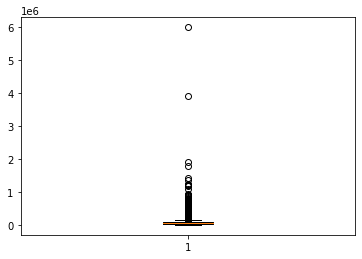

In [52]:
#annual_inc has outliers
plt.boxplot(df1['annual_inc'])
plt.show()

In [54]:
#Analyse other percentiles
print(df1.annual_inc.quantile(np.linspace(.8, 1, 9, 0)))
print(df1.annual_inc.quantile(np.linspace(.91, 1, 9, 0)))

0.800000     90000.0
0.822222     95000.0
0.844444     99996.0
0.866667    104000.0
0.888889    110000.0
0.911111    120000.0
0.933333    130000.0
0.955556    145000.0
0.977778    180000.0
Name: annual_inc, dtype: float64
0.91    120000.00
0.92    121000.00
0.93    126000.00
0.94    132000.00
0.95    140000.00
0.96    150000.00
0.97    162000.00
0.98    182498.72
0.99    230000.00
Name: annual_inc, dtype: float64


In [55]:
##99 percentile looks good for analysis
#Remove > 99 percentile 
df1 = df1[df1.annual_inc <= df1.annual_inc.quantile(0.99)]
df1.shape

(35022, 40)

### Univariate, Bivariate and Multivariate Analysis

### Univariate Analysis

In [56]:
#Categorical - Important variables
cat_vars = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'addr_state','purpose', 'issue_year','issue_month']

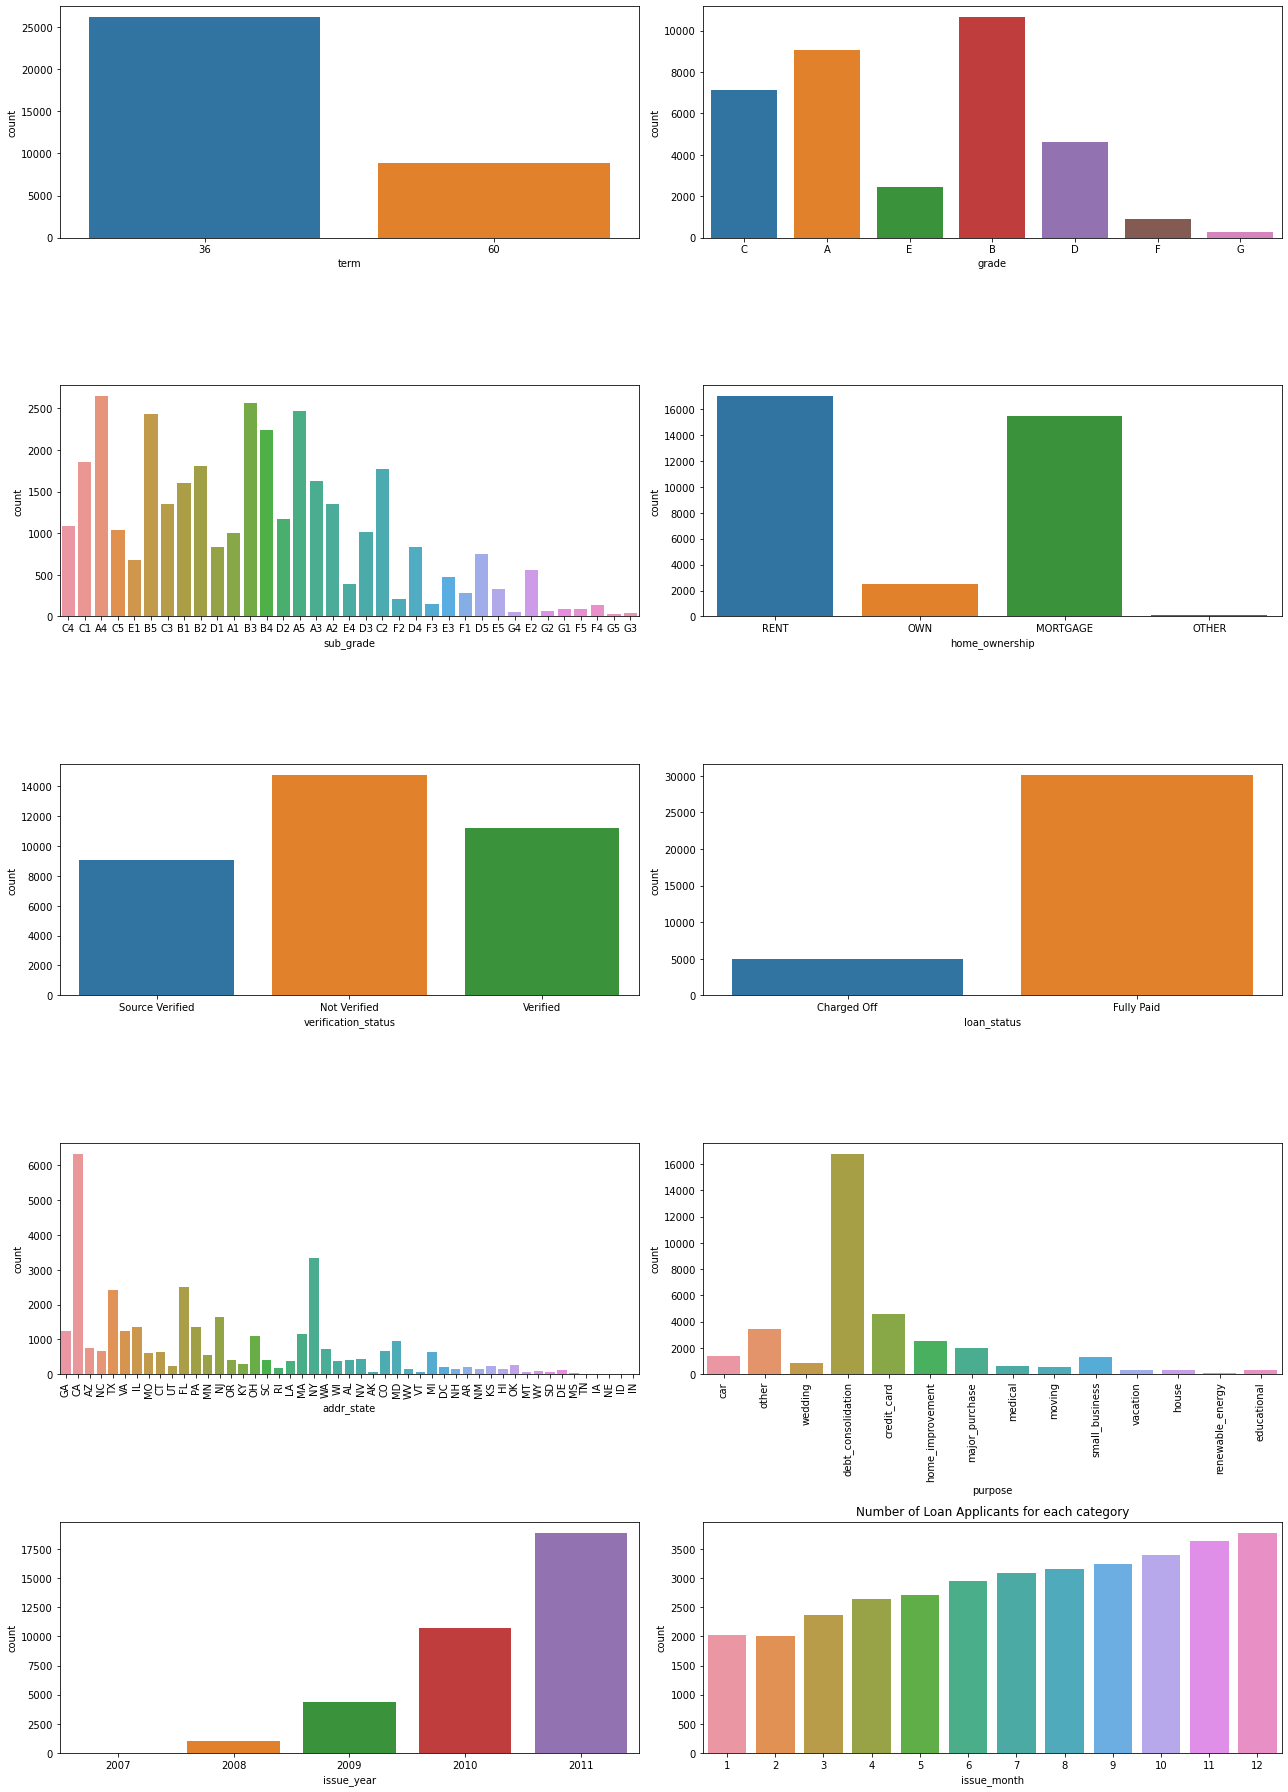

In [57]:
##Number of Loan applicants per category

i=1
plt.figure(figsize=(18,25))
for var in cat_vars:
    plt.subplot(5, 2, i)
    sns.countplot(data=df1,x=var)
    if var in ['addr_state','purpose']:
        plt.xticks(rotation=90)
    i=i+1

plt.title('Number of Loan Applicants for each category')
plt.tight_layout()
plt.show()

### Observations from above univariate plots
- Most of applicants take loan for term of 36 months
- Most applicants belong to employment grade = B, A and Subgrade = A4, B4, A5, B5, Grades = F, G has very less applicants
- Most loan applicants have rented house or house which is Mortgage. Own house applicants are less
- Income is not verified for most of the applicants
- Most applicants are from State = CA
- Most applicants take loan for debt_consolidation
- Loan is issued more in Year = 2011 and the number increase monthly and more issues towards the end of year

### Bivariate analysis

In [58]:
#Numerical - Important variables
num_vars = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
'total_acc',  'pub_rec_bankruptcies']

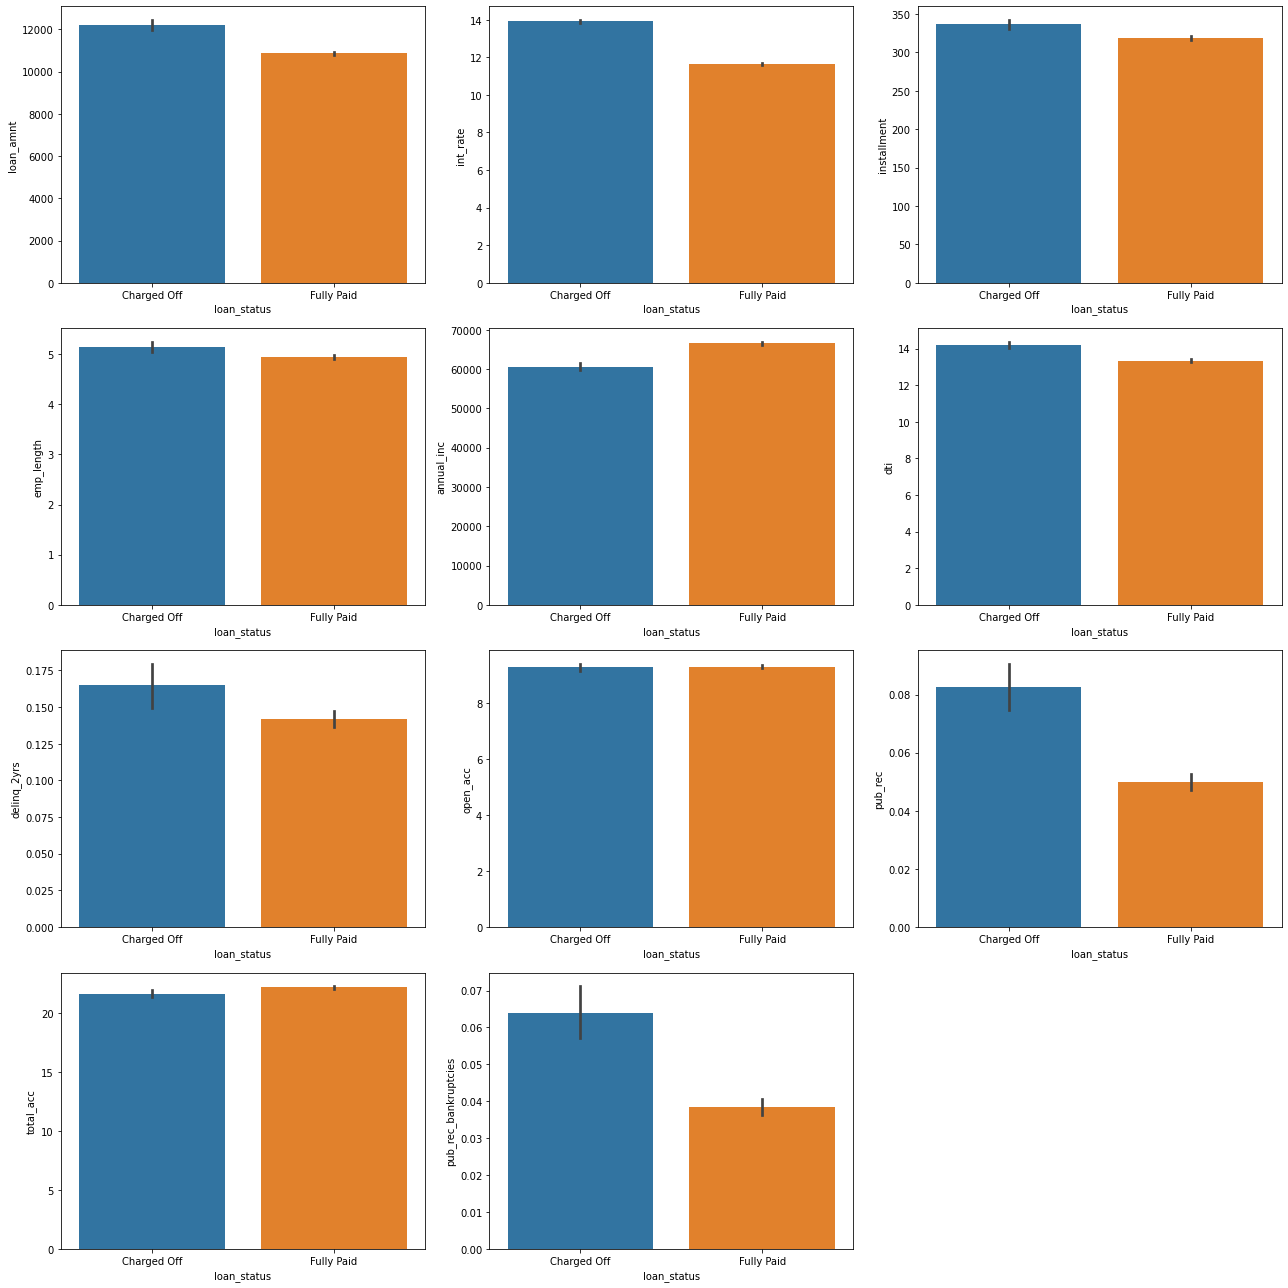

In [59]:
##Mean of numeric variables per loan_status
i=1
plt.figure(figsize=(18,18))
for var in num_vars:
    plt.subplot(4, 3, i)
    sns.barplot(data = df1, x = 'loan_status', y = var, estimator = np.mean)
    i=i+1

plt.tight_layout()
plt.show()

### Observations from above bivariate plots
- Loan amount, int_rate - high for defaulters
- annual_inc - high for fullypaid. Defaulters have comparitively less.
- open_acc, total_acc - not much variation between fully_paid vs defaulters
- pub_rec, pub_rec_bankruptcies, delinq_2yrs - high for defaulters
- emp_length - mean is not giving much difference.
- dti - comparitively high for defaulters, not much difference between fully_paid to defaulters.

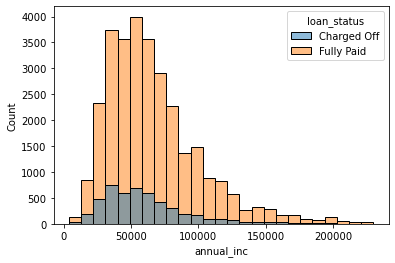

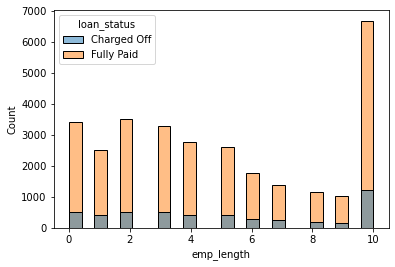

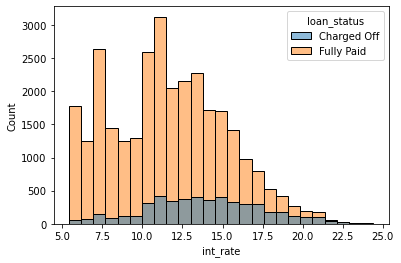

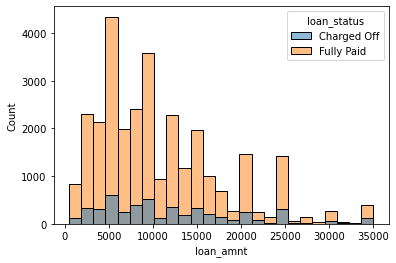

In [67]:
#Distribution of annual_inc, emp_length, int_rate, loan_amount vs loan_status

sns.histplot(data = df1, bins = 25, hue = 'loan_status', x = 'annual_inc')
plt.show()
sns.histplot(data = df1, hue = 'loan_status', x = 'emp_length')
plt.show()
sns.histplot(data = df1, bins = 25, hue = 'loan_status', x = 'int_rate')
plt.show()
sns.histplot(data = df1, bins = 25, hue = 'loan_status', x = 'loan_amnt')
plt.show()

### Observations from above distribution plots
- Most of the loan applicants have annual income in the range of 25k to 75K. Defaulters are also falling in the same range.
- More applicants are highly experienced with >=10 years, and number of defaulters are high in this range.
- More applicants are in range of 10% to 12.5% int_rate and >=11% int_rate has more defaulters.

In [75]:
cat_vars_set1 = cat_vars
cat_vars_set2 = ['addr_state','grade','sub_grade']

In [76]:
cat_vars_set1 = list(set(cat_vars_set1) - set(cat_vars_set2))
cat_vars_set1.remove('loan_status')
cat_vars_set1.sort()

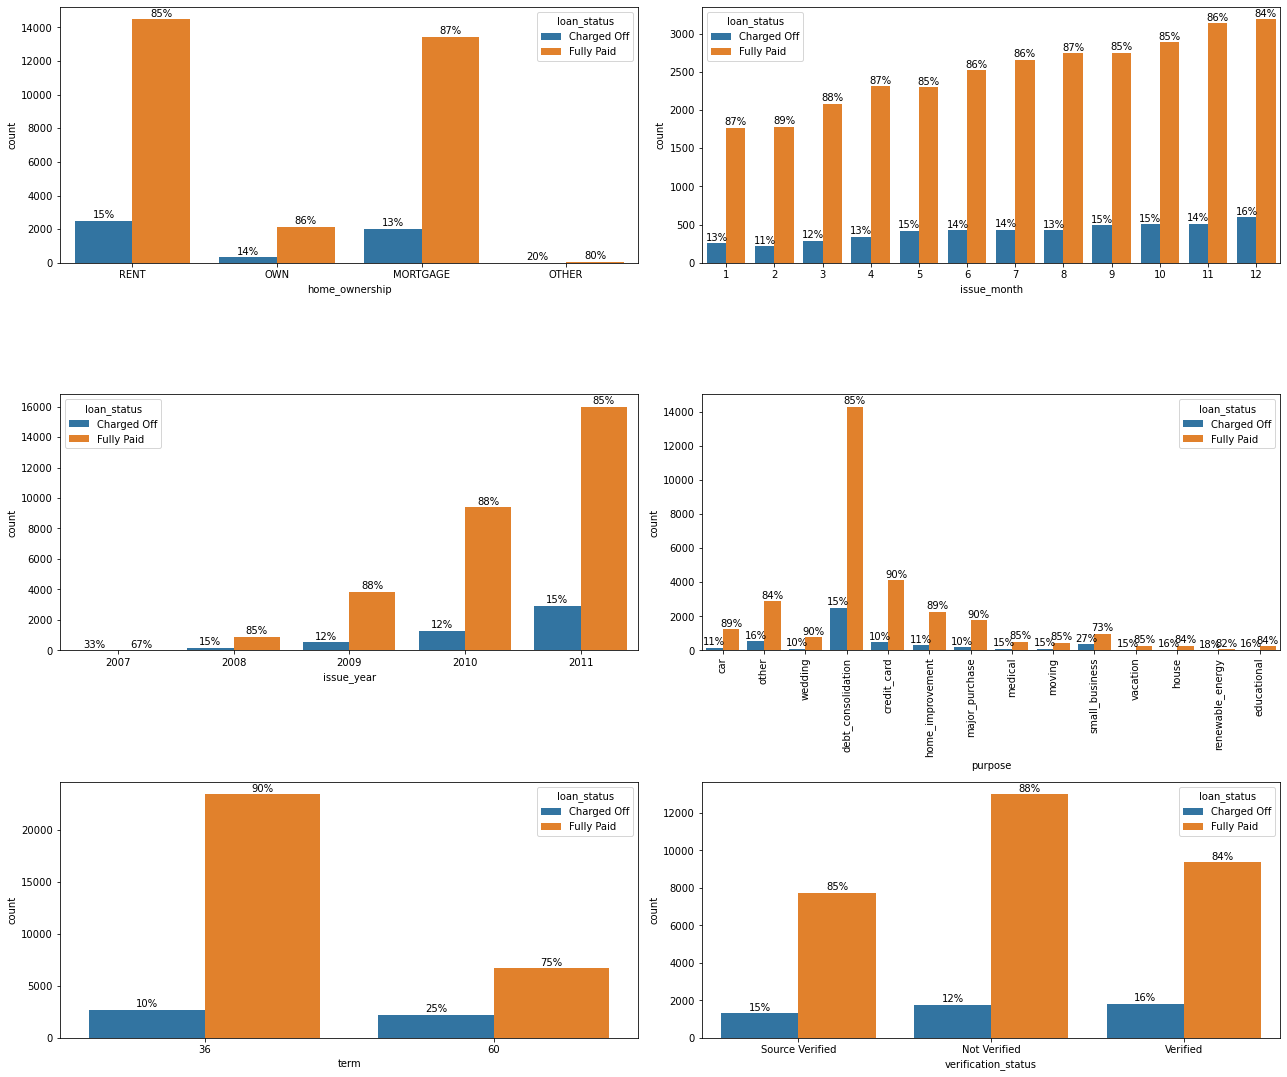

In [77]:
##Number of applicants per loan_status for each category
i=1
total_rec = df1.shape[0]
plt.figure(figsize=(18,20))
for var in cat_vars_set1:
    plt.subplot(4, 2, i)
    ax = sns.countplot(data=df1,x=var,hue='loan_status')
    if var == 'purpose':
        plt.xticks(rotation=90)
    var_unique_count = df1[var].unique().size
    bars = ax.patches
    for m in range(var_unique_count):
        hueBars = bars[m:][::var_unique_count]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            percentage = f'{100 * bar.get_height()/total:.0f}%\n'
            x = bar.get_x() + bar.get_width()/2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
    i=i+1

plt.tight_layout()
plt.show()

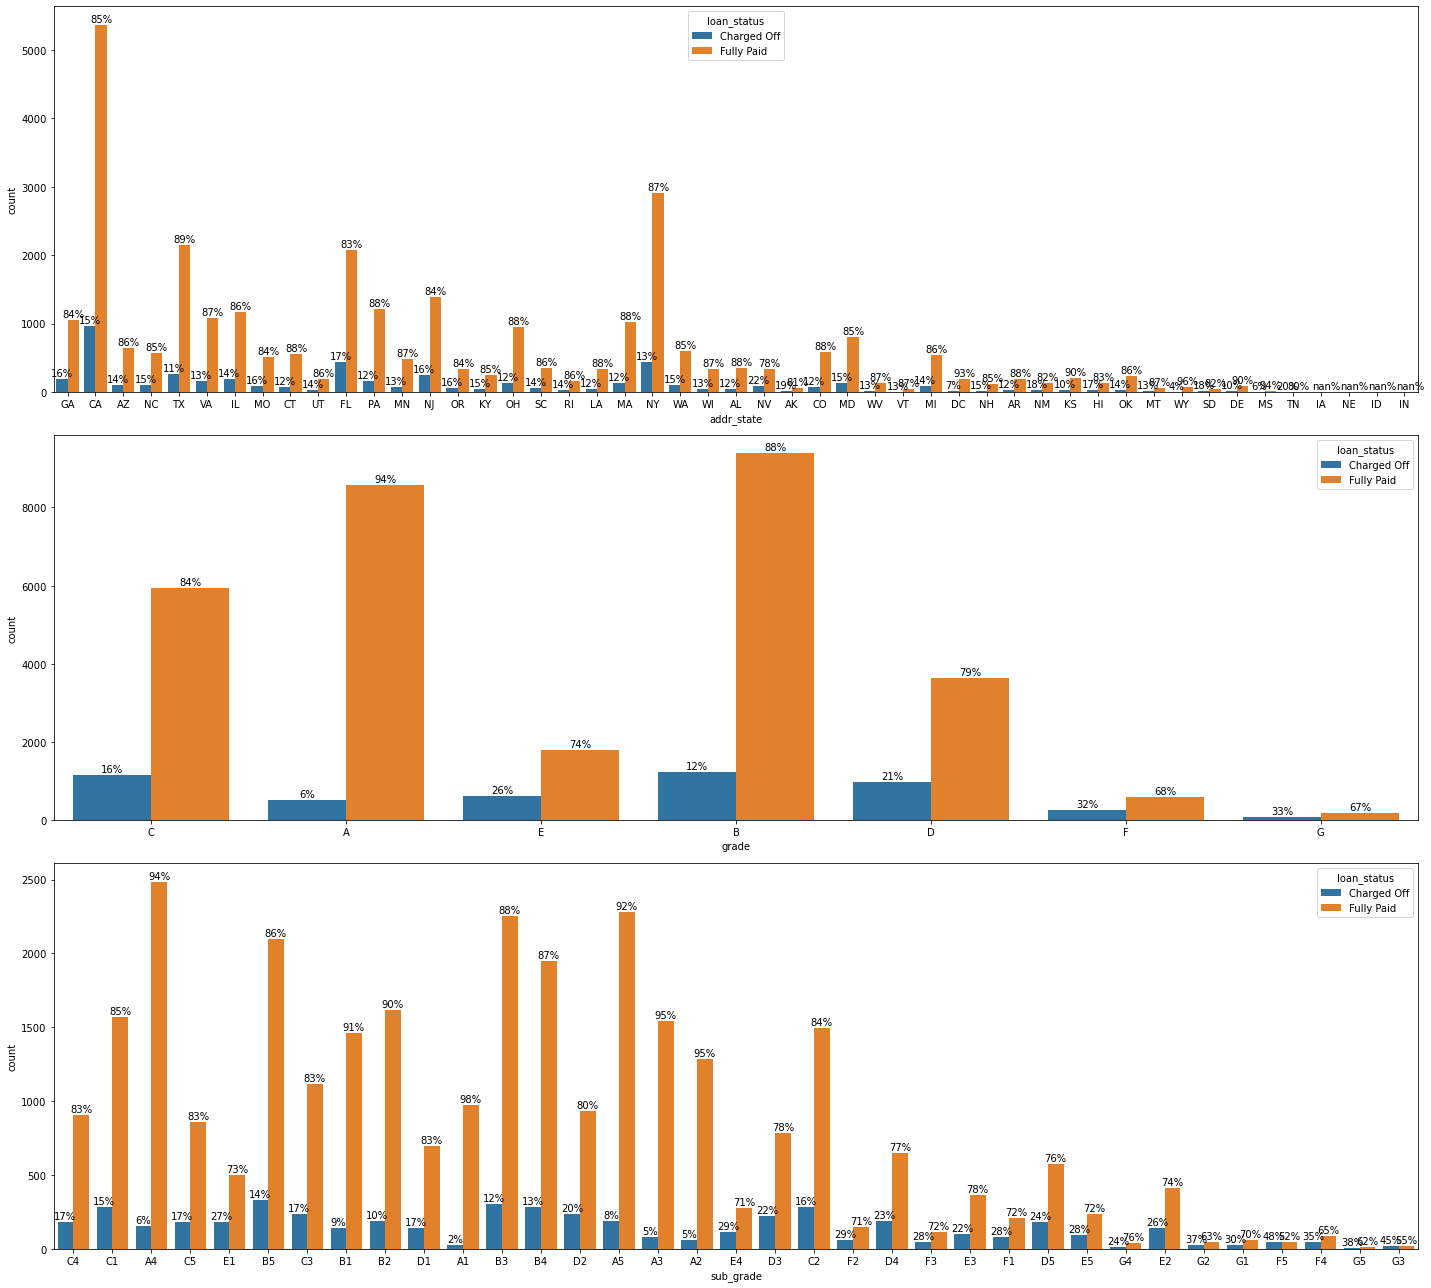

In [78]:
##Number of applicants per loan_status for each category
i=1
total_rec = df1.shape[0]
plt.figure(figsize=(20,18))
for var in cat_vars_set2:
    plt.subplot(3, 1, i)
    ax = sns.countplot(data=df1,x=var,hue='loan_status')
    var_unique_count = df1[var].unique().size
    bars = ax.patches
    for m in range(var_unique_count):
        hueBars = bars[m:][::var_unique_count]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            percentage = f'{100 * bar.get_height()/total:.0f}%\n'
            x = bar.get_x() + bar.get_width()/2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
    i=i+1

plt.tight_layout()
plt.show()

### Observations from above plots
- Home ownership - percentage of defaulters is similar across each category of home ownership
- Year 2011 and 2008 has high percentage of defaulters and similar behaviour
- Monthly loan issue increases and defaulters percentage remains similar. Not a good indicator.
- purpose - Even though number of applicants and defaulters are high for debt_consolidation, small_business has more percentage of defaulters
- term=36 months have fully paid loan. 60months has more percentage of defaulters.
- income verification status is not strong indicator, not_verified status has more percentage fully paid. Defaulter percentage is similar in all status.
- More applicants are from State ‘CA’, ‘NY’ and ‘FL’ and hence contributes to more number of defaulters.
- Grades - Even though applicants are less, gardes F, G have more percentage of defaulters.
- grades A, B have more percentage of paid loan
- Subgrades of E,F,G has more percentage of defaulters

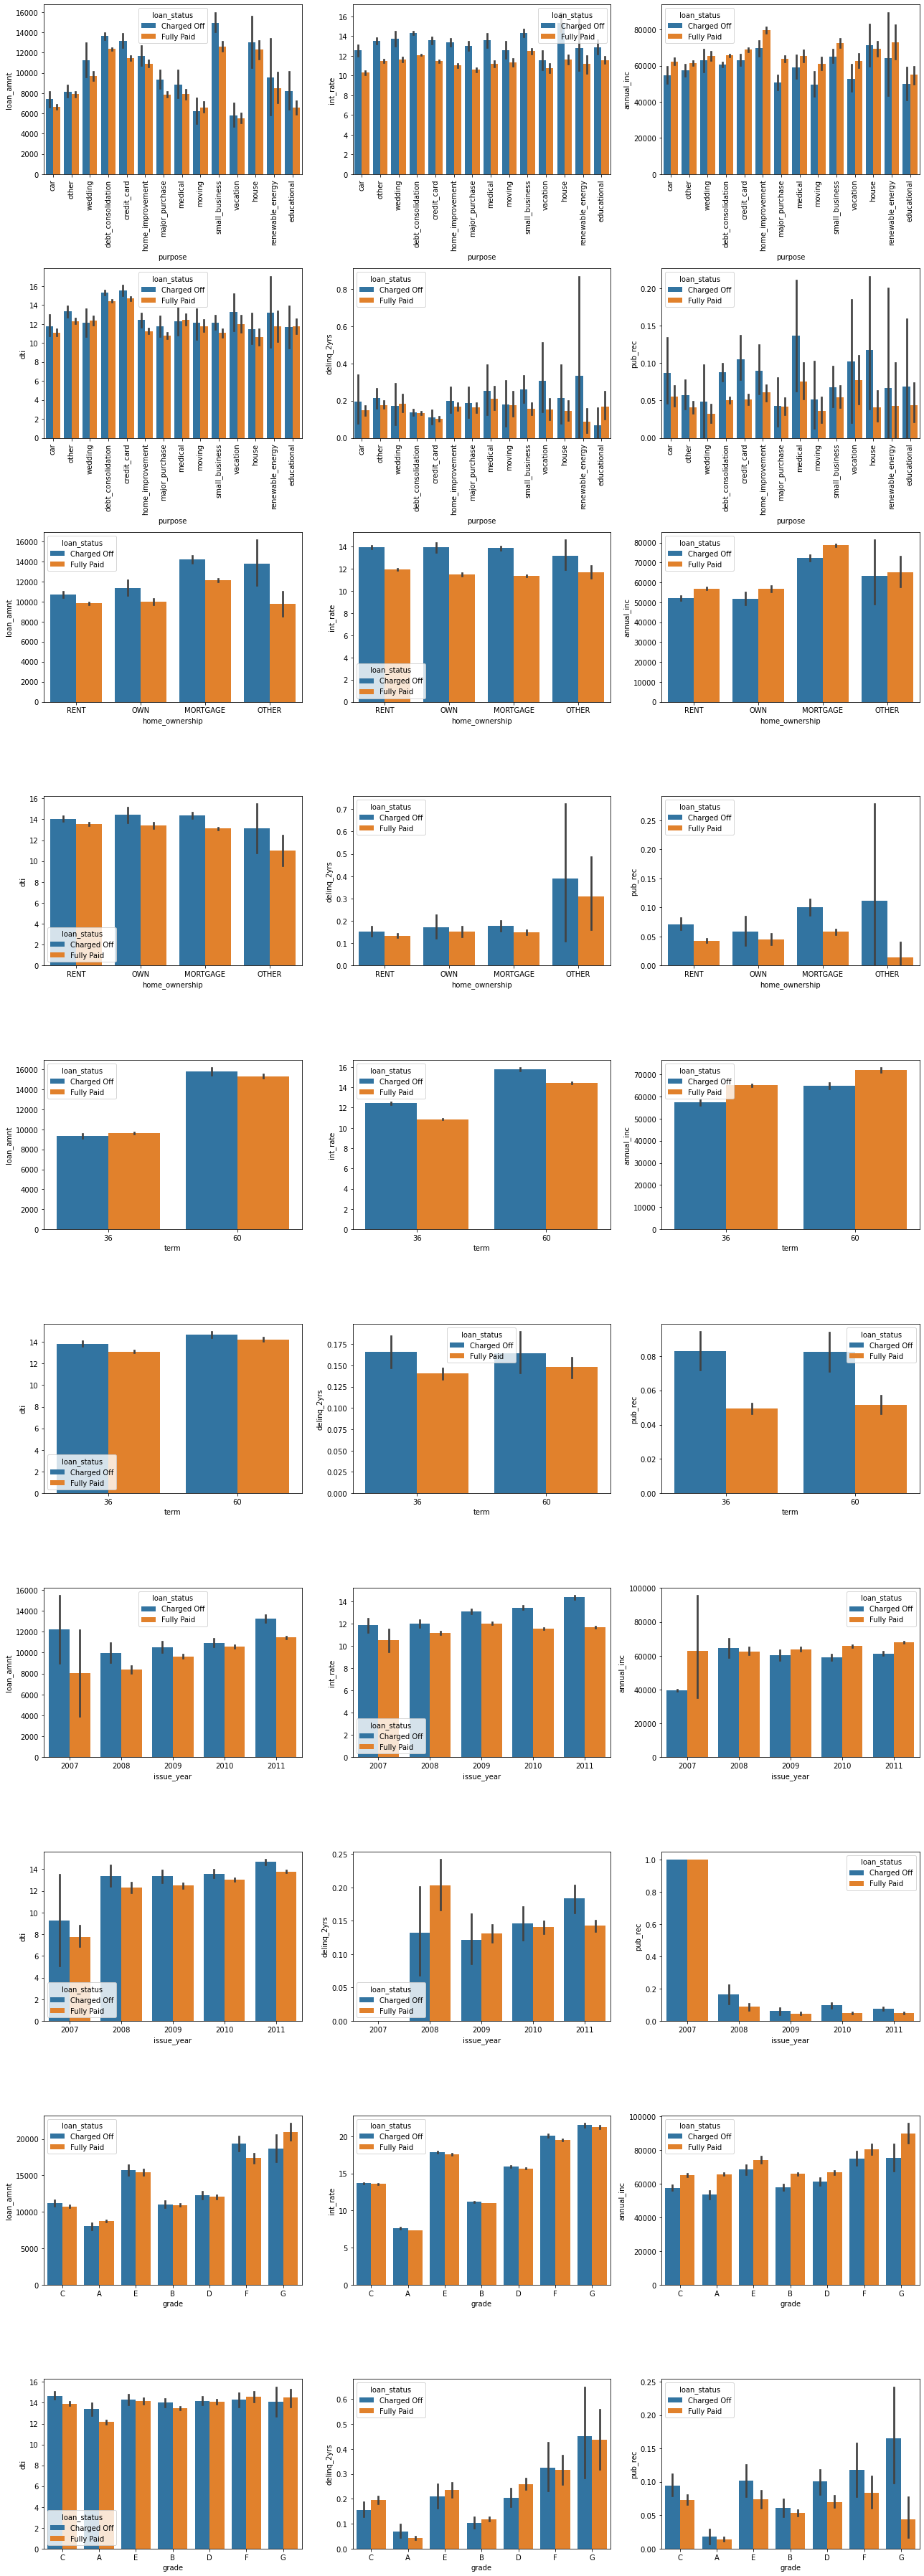

In [79]:
x_var = ['purpose','home_ownership','term','issue_year','grade']
y_var = ['loan_amnt','int_rate','annual_inc','dti','delinq_2yrs','pub_rec']

i=1
plt.figure(figsize=(18,50))
for x in x_var:
    for y in y_var:
        plt.subplot(10, 3, i)
        sns.barplot(data =df1,x=x, y=y, hue ='loan_status', estimator=np.mean)
        i=i+1
        if x == 'purpose':
            plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Observations from above plots
- Higher interest rates (average : >12%) - indicator of default
- Higher loan amount for small_business, credit_card and debt_consolidation - indicator of default
- Higher loan amount in Grade F - indicator of default
- Higher loan amount with Home ownership - Mortgage or Other - indicator of default
- Compared to defaulters, fully paid applicants having higher annual_income have less loan amount
- Grade G with more public_records and defaulters.
- Annual_inc high for Grade G and Less for grade A
- Applicants with public_record - likely to default
- In 2011, loan_amount and int_rate high for defaulters
- Purpose : credit_card and debt_cosolidation has defaulters with high dti.

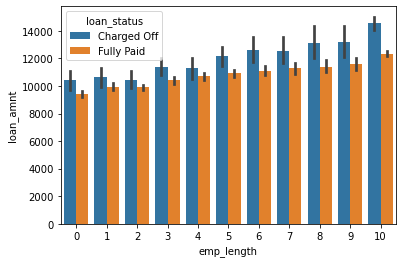

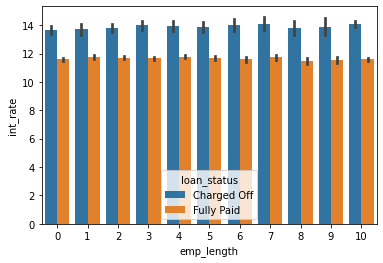

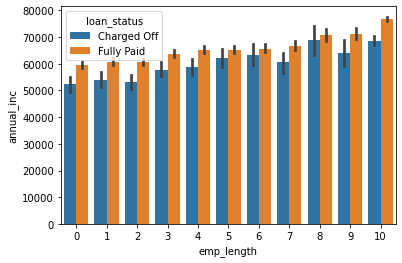

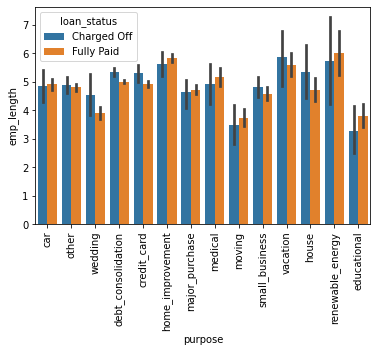

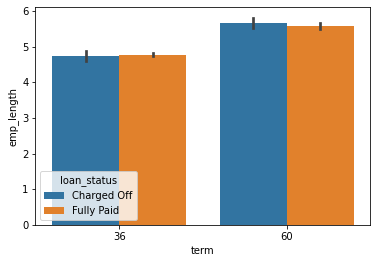

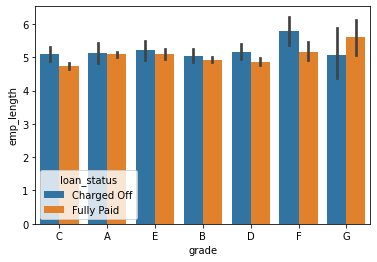

In [74]:
##Analysing emp_length against other variables, to understand the impact
#loan_amount, int_rate, annual_inc, purpose, term, grade

sns.barplot(data =df1,x='emp_length', y='loan_amnt', hue ='loan_status', estimator=np.mean)
plt.show()
sns.barplot(data =df1,x='emp_length', y='int_rate', hue ='loan_status', estimator=np.mean)
plt.show()
sns.barplot(data =df1,x='emp_length', y='annual_inc', hue ='loan_status', estimator=np.mean)
plt.show()
sns.barplot(data =df1,x='purpose', y='emp_length', hue ='loan_status')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data =df1,x='term', y='emp_length', hue ='loan_status', estimator=np.mean)
plt.show()
sns.barplot(data =df1,x='grade', y='emp_length', hue ='loan_status', estimator=np.mean)
plt.show()

### Observations from above plots
- Experience level increases annual income increases
- Higher experience level is given loan with higher amount and are prone to default.
- Grade F is prone to default, even with high experience.
- Higher interest rate, prone to default irrespective of experience level

### Multi-variate analysis

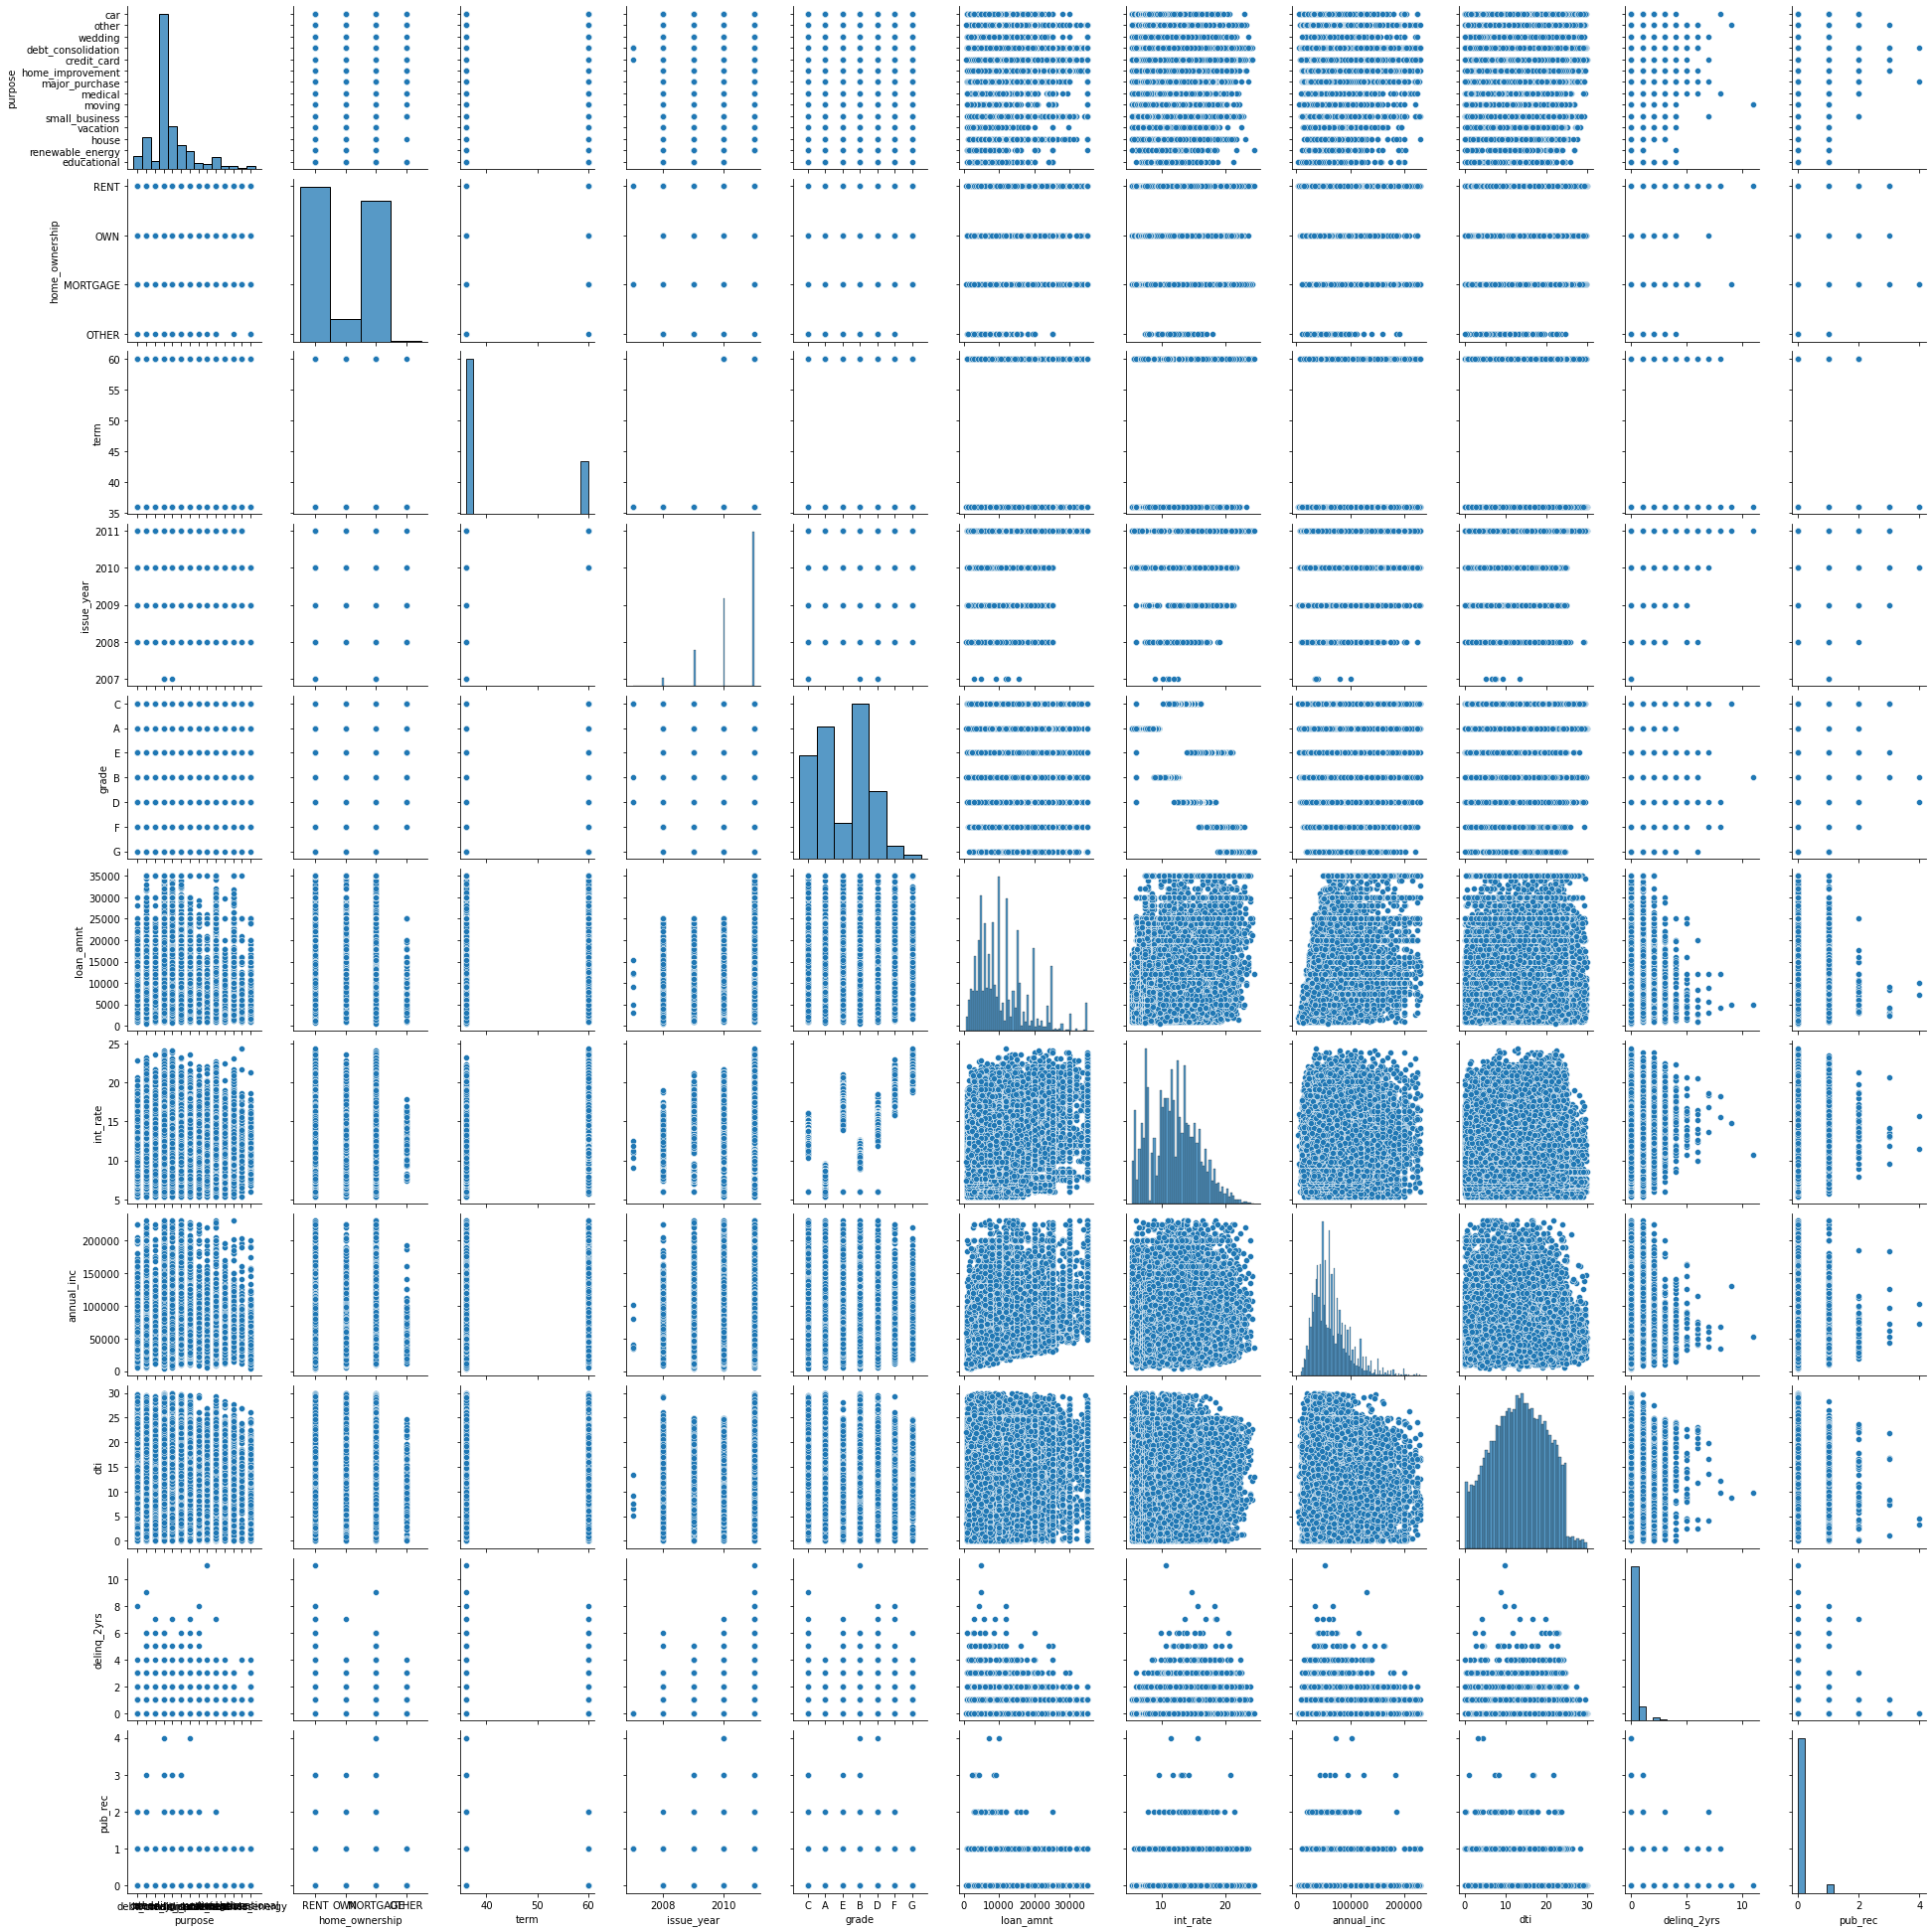

In [80]:
#Pair Plot
sns.pairplot(df1,vars=x_var+y_var)
plt.show()

In [81]:
# Create a column defaulted (indicating an applicant was defaulted or not), based on loan_status
df1['defaulted'] = df1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [82]:
# Print the final dataset with column defaulted
df1

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,defaulted
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,12,1
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,12,0
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,12,0
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,2011,12,0
7,3000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,2011,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36,10.91,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,...,0.00,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0,2007,12,0
39562,4800,36,10.28,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,...,0.00,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0,2007,11,0
39623,9000,36,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,...,0.00,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0,2007,10,1
39666,15450,36,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,...,0.00,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0,2007,8,1


In [83]:
##Correlation Matrix
df1[x_var+y_var+['defaulted']].corr()

,term,issue_year,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,pub_rec,defaulted
term,1.000000,0.229040,0.351457,0.440874,0.074661,0.075727,0.008054,0.011348,0.180028
issue_year,0.229040,1.000000,0.114777,0.025755,0.040704,0.077918,0.002726,-0.016343,0.032012
loan_amnt,0.351457,0.114777,1.000000,0.296947,0.406793,0.072021,-0.039251,-0.044971,0.065282
int_rate,0.440874,0.025755,0.296947,1.000000,0.062753,0.113611,0.156765,0.100910,0.212751
annual_inc,0.074661,0.040704,0.406793,0.062753,1.000000,-0.111518,0.026364,-0.013201,-0.060230
dti,0.075727,0.077918,0.072021,0.113611,-0.111518,1.000000,-0.034032,-0.006834,0.044796
delinq_2yrs,0.008054,0.002726,-0.039251,0.156765,0.026364,-0.034032,1.000000,0.012256,0.016233
pub_rec,0.011348,-0.016343,-0.044971,0.100910,-0.013201,-0.006834,0.012256,1.000000,0.048196
defaulted,0.180028,0.032012,0.065282,0.212751,-0.060230,0.044796,0.016233,0.048196,1.000000


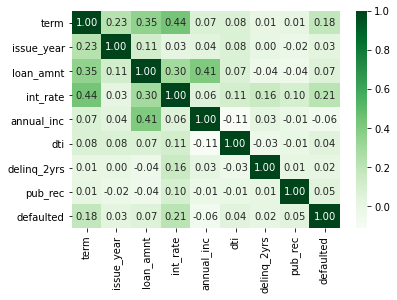

In [84]:
#Heat Map
corr = df1[x_var+y_var+['defaulted']].corr()
#plt.figure(figsize=[12,10])
sns.heatmap(corr,cmap = "Greens", annot=True,fmt='.2f')
plt.show()

### Observations on Correlation Matrix
- Higher the loan tenure and Higher the Interest rate, chances of default
- Higher the annual income, high loan amount sanctioned
- Higher the term, the interest rate and loan amount are higher
- Annual Income increases debt-to-income ratio reduces

## Recommendations
- Take extra precautions while sanctioning the loans to borrowers in States ‘CA’, ‘NY’ and ‘FL’.
- Try to reduce approving the loans for 60 months tenure period with higher rate of interest.
- Approve lesser loan amount for borrowers with home ownership category – ‘MORTGAGE’ and ‘OTHER’.
- Reduce the loans sanctioned for borrowers with purpose as ‘debt consolidation’. Also take extra precautions while approving the loan, as most of the borrowers tend to default.
- Reduce the loan amount for borrowers with purpose as ‘Small Business’.
- Try to reduce approving the loan with higher amount for borrowers of Grades ‘F’ and ‘G’.